Goal:Build a model to forecast Corporation Favorita unit Sales

**Hypothesis

Regardless of stores, some products sell more
Holiday Periods impact sales
High Oil prices negatively impact sales in each cluster of stores
EarthQuake impacted sales negatively


**Questions

1.Is sales influenced by specific dates; weekly, monthly, yearly?
2.Do some items sell more than others and by how much?
3.What are the most and least family product sales on holidays?
4.What is the best performing store?
5.Does location influence store sales?
6.By how much does change in oil prices negatively impact sales?
7.Does promotion influence sales and by how much?


In [4]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Exploring various datasets

In [5]:
#loading train data
train =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
train =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
#checking number of stores
train.store_nbr.nunique()

54

In [8]:
#checking number of products under family
train.family.nunique()

33

In [9]:
#checking range of data
train.date.min(), train.date.max()

('2013-01-01', '2017-08-15')

In [10]:
train['sales date']=pd.to_datetime(train['date']).dt.date

In [11]:
#checking range of data
train['sales date'].min(), train['sales date'].max()

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 15))

In [12]:
#checking completeness of dates
difference =train['sales date'].max()-train['sales date'].min()
difference

datetime.timedelta(days=1687)

In [13]:
#confirming  expected number of days from dataset
difference.days+ 1

1688

In [14]:
#checking actual number of days from dataset
train['sales date'].nunique()

1684

**show missing dates

In [15]:
expected_dates=pd.date_range(start=train['sales date'].min(),end=train['sales date'].max())
expected_dates.date

array([datetime.date(2013, 1, 1), datetime.date(2013, 1, 2),
       datetime.date(2013, 1, 3), ..., datetime.date(2017, 8, 13),
       datetime.date(2017, 8, 14), datetime.date(2017, 8, 15)],
      dtype=object)

In [16]:
set(expected_dates.date)-set(train['sales date'].unique())

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [17]:
#impute missing dates for 2013
new_date_range = pd.date_range('2013-12-01', '2013-12-31')
new_date_range.date
new_date_range = pd.date_range(start="2013-12-25", end="2013-12-25")
train.reindex(new_date_range, fill_value=0)

,id,date,store_nbr,family,sales,onpromotion,sales date
2013-12-25,0,0,0,0,0.0,0,0


In [18]:
#impute missing dates for 2014
new_date_range = pd.date_range('2014-12-01', '2014-12-31')
new_date_range.date
new_date_range = pd.date_range(start="2014-12-25", end="2014-12-25")
train.reindex(new_date_range, fill_value=0)

,id,date,store_nbr,family,sales,onpromotion,sales date
2014-12-25,0,0,0,0,0.0,0,0


In [19]:
#impute missing dates for 2015
new_date_range = pd.date_range('2015-12-01', '2015-12-31')
new_date_range.date
new_date_range = pd.date_range(start="2015-12-25", end="2015-12-25")
train.reindex(new_date_range, fill_value=0)

,id,date,store_nbr,family,sales,onpromotion,sales date
2015-12-25,0,0,0,0,0.0,0,0


In [20]:
#impute missing dates for 2016
new_date_range = pd.date_range('2016-12-01', '2016-12-31')
new_date_range.date
new_date_range = pd.date_range(start="2016-12-25", end="2016-12-25")
train.reindex(new_date_range, fill_value=0)

,id,date,store_nbr,family,sales,onpromotion,sales date
2016-12-25,0,0,0,0,0.0,0,0


In [21]:
from itertools import product

In [22]:
missing_dates=set(expected_dates.date)-set(train['sales date'].unique())
unique_stores =train.store_nbr.unique()
unique_families =train.family.unique()


In [23]:
missing_data=list(product(missing_dates, unique_stores, unique_families))
missing_data

[(datetime.date(2013, 12, 25), 1, 'AUTOMOTIVE'),
 (datetime.date(2013, 12, 25), 1, 'BABY CARE'),
 (datetime.date(2013, 12, 25), 1, 'BEAUTY'),
 (datetime.date(2013, 12, 25), 1, 'BEVERAGES'),
 (datetime.date(2013, 12, 25), 1, 'BOOKS'),
 (datetime.date(2013, 12, 25), 1, 'BREAD/BAKERY'),
 (datetime.date(2013, 12, 25), 1, 'CELEBRATION'),
 (datetime.date(2013, 12, 25), 1, 'CLEANING'),
 (datetime.date(2013, 12, 25), 1, 'DAIRY'),
 (datetime.date(2013, 12, 25), 1, 'DELI'),
 (datetime.date(2013, 12, 25), 1, 'EGGS'),
 (datetime.date(2013, 12, 25), 1, 'FROZEN FOODS'),
 (datetime.date(2013, 12, 25), 1, 'GROCERY I'),
 (datetime.date(2013, 12, 25), 1, 'GROCERY II'),
 (datetime.date(2013, 12, 25), 1, 'HARDWARE'),
 (datetime.date(2013, 12, 25), 1, 'HOME AND KITCHEN I'),
 (datetime.date(2013, 12, 25), 1, 'HOME AND KITCHEN II'),
 (datetime.date(2013, 12, 25), 1, 'HOME APPLIANCES'),
 (datetime.date(2013, 12, 25), 1, 'HOME CARE'),
 (datetime.date(2013, 12, 25), 1, 'LADIESWEAR'),
 (datetime.date(2013, 12, 2

In [24]:
tmp_data =pd.DataFrame(missing_data, columns =['Sales date','store_nbr','family'])

In [25]:
#merging dataframes to complete train data
combined_train=pd.concat([train, tmp_data], ignore_index =True)
combined_train

,id,date,store_nbr,family,sales,onpromotion,sales date,Sales date
0,0.0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013-01-01,NaN
1,1.0,2013-01-01,1,BABY CARE,0.0,0.0,2013-01-01,NaN
2,2.0,2013-01-01,1,BEAUTY,0.0,0.0,2013-01-01,NaN
3,3.0,2013-01-01,1,BEVERAGES,0.0,0.0,2013-01-01,NaN
4,4.0,2013-01-01,1,BOOKS,0.0,0.0,2013-01-01,NaN
...,...,...,...,...,...,...,...,...
3008011,NaN,NaN,9,POULTRY,NaN,NaN,NaN,2015-12-25
3008012,NaN,NaN,9,PREPARED FOODS,NaN,NaN,NaN,2015-12-25
3008013,NaN,NaN,9,PRODUCE,NaN,NaN,NaN,2015-12-25
3008014,NaN,NaN,9,SCHOOL AND OFFICE SUPPLIES,NaN,NaN,NaN,2015-12-25


In [26]:
print(train.info(), "\n")
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   sales date   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 160.3+ MB
None 



,id,date,store_nbr,family,sales,onpromotion,sales date
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013-01-01
1,1,2013-01-01,1,BABY CARE,0.000,0,2013-01-01
2,2,2013-01-01,1,BEAUTY,0.000,0,2013-01-01
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013-01-01
4,4,2013-01-01,1,BOOKS,0.000,0,2013-01-01
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017-08-15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017-08-15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017-08-15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017-08-15


In [27]:
#checking for missing values
missing_values = train.isnull().sum().sort_values(ascending = True)
missing_values

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
sales date     0
dtype: int64

Question 1: Is Sales influenced by specific dates?

In [28]:
aggregated_sales_per_date =train.groupby(['sales date'], as_index =False)['sales'].sum()

<AxesSubplot:xlabel='sales date'>

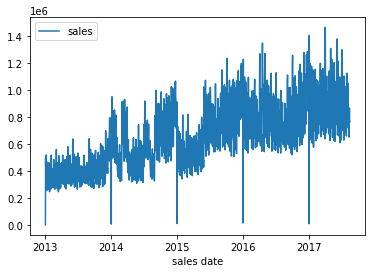

In [29]:
aggregated_sales_per_date.plot( x= 'sales date', y = 'sales', kind ='line')

In [30]:
train['year']=pd.to_datetime(train['date']).dt.year
train['month']=pd.to_datetime(train['date']).dt.month
train['week']=pd.to_datetime(train['date']).dt.week
train['day']=pd.to_datetime(train['date']).dt.day


In [31]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,sales date,year,month,week,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01-01,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013-01-01,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013-01-01,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013-01-01,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013-01-01,2013,1,1,1


In [32]:
aggregated_sales_per_date.head()

,sales date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [33]:
aggregated_sales_per_date['year']= pd.to_datetime(aggregated_sales_per_date['sales date']).dt.year

In [34]:
aggregated_sales_per_date.head()

,sales date,sales,year
0,2013-01-01,2511.618999,2013
1,2013-01-02,496092.417944,2013
2,2013-01-03,361461.231124,2013
3,2013-01-04,354459.677093,2013
4,2013-01-05,477350.121229,2013


In [35]:
aggregated_sales_per_date.groupby(['year'], as_index =False)['sales'].max()

,year,sales
0,2013,7.928653e+05
1,2014,1.064978e+06
2,2015,1.234131e+06
3,2016,1.345921e+06
4,2017,1.463084e+06


In [36]:
tmp= aggregated_sales_per_date.groupby(['year'], as_index =False)['sales'].max()
for row in tmp.itertuples():
    musk =(aggregated_sales_per_date['year'] ==row.year) &(aggregated_sales_per_date['sales']==row.sales)
    tmp_row =aggregated_sales_per_date.loc[musk]
    print('peak sales for', row.year,'occurred on', tmp_row['sales date'].values, 'for', row.sales, 'items')

peak sales for 2013 occurred on [datetime.date(2013, 12, 23)] for 792865.284427 items
peak sales for 2014 occurred on [datetime.date(2014, 12, 23)] for 1064977.9730725 items
peak sales for 2015 occurred on [datetime.date(2015, 10, 4)] for 1234130.938595 items
peak sales for 2016 occurred on [datetime.date(2016, 4, 18)] for 1345920.6048929 items
peak sales for 2017 occurred on [datetime.date(2017, 4, 1)] for 1463083.962459 items


In [37]:
#finding out if promotion had any influence on peak sales days
promo_sort =(train.loc[train['sales'].max()]).sort_values
promo_sort                                                                           

<bound method Series.sort_values of id                 124717
date           2013-03-11
store_nbr               9
family               EGGS
sales               116.0
onpromotion             0
sales date     2013-03-11
year                 2013
month                   3
week                   11
day                    11
Name: 124717, dtype: object>

Question 2: Do some items sell more than others and by how much? 

In [38]:
family_set = (train.groupby(by = "family").sales.agg(["sum"]).sort_values(by = "sum", ascending = False))
family_set

,sum
family,
GROCERY I,3.434627e+08
BEVERAGES,2.169545e+08
PRODUCE,1.227047e+08
CLEANING,9.752129e+07
DAIRY,6.448771e+07
BREAD/BAKERY,4.213395e+07
POULTRY,3.187600e+07
MEATS,3.108647e+07
PERSONAL CARE,2.459205e+07


Text(0.5, 1.0, 'Total sales by Product Family')

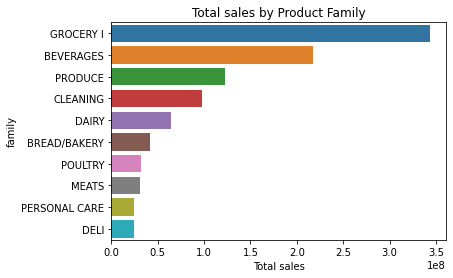

In [39]:
#generate a barchart to visualize
family_set = (train.groupby(by = "family").sales.agg(["sum"]).sort_values(by = "sum", ascending = False))
family_set
sns.barplot(x = (family_set["sum"])[:10], y = (family_set.index)[:10])
plt.xlabel("Total sales")
plt.ylabel("family")
plt.title("Total sales by Product Family")

In [40]:
test =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [41]:
test =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/test.csv")
test.head(15)

,id,date,store_nbr,family,onpromotion
0,3000888,8/16/2017,1,AUTOMOTIVE,0
1,3000889,8/16/2017,1,BABY CARE,0
2,3000890,8/16/2017,1,BEAUTY,2
3,3000891,8/16/2017,1,BEVERAGES,20
4,3000892,8/16/2017,1,BOOKS,0
5,3000893,8/16/2017,1,BREAD/BAKERY,12
6,3000894,8/16/2017,1,CELEBRATION,0
7,3000895,8/16/2017,1,CLEANING,25
8,3000896,8/16/2017,1,DAIRY,45
9,3000897,8/16/2017,1,DELI,18


In [42]:
#checking number of stores
test.store_nbr.nunique()

54

In [43]:
#checking number of products under family
test.family.nunique()

33

In [44]:
stores= pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/stores.csv")
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [45]:
stores.city.nunique()

22

In [46]:
#dropping duplicates in stores dataset
stores.drop_duplicates(inplace =True)
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [47]:
unique_cities =(stores.loc[:,'city']).value_counts()
unique_cities

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [48]:
transactions =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/transactions.csv")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [49]:
transactions =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/transactions.csv")
transactions.head(15)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [50]:
#dropping duplicates in transactions dataset
transactions.drop_duplicates(inplace =True)
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [51]:
best_store = (transactions.groupby(by = "store_nbr").transactions.agg(["sum"]).sort_values(by = "sum", ascending = False))
best_store

,sum
store_nbr,
44,7273093
47,6535810
45,6201115
46,5990113
3,5366350
48,5107785
8,4637971
49,4574103
50,4384444


In [52]:
oil =pd.read_csv("C:/Users/HP/Documents/Jupyter/Corporation Favorita/oil.csv")
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [53]:
#dealing with missing values by replacing nulls with mean prices 
oil['dcoilwtico'].fillna(oil['dcoilwtico'].mean, inplace =True)
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64